In [19]:
import numpy as np
import pandas as pd
import healpy as hp
import matplotlib.pyplot as plt

In [20]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 18) 
mpl.rc('ytick', labelsize = 18)

In [21]:
my_color = '#97a7a7'
my_color_darker = '#2f4f4f'
my_color2 = '#f8c997'
my_color2_darker = '#f6b26b'

In [22]:
# read output data from CLASS and output a dataframe
def read_Pk_from_class(file):
    file = open(file, 'r')
    lines = file.readlines()
    file.close()

    k = [] # in  h/Mpc
    Pk = [] # in Mpc^3/h^3
    
    for line in lines[4:]:
        k.append(float(line.split()[0]))
        Pk.append(float(line.split()[1]))

    # output Pk and k as dataframe
    pk_df = pd.DataFrame({'k': k, 'Pk': Pk})
    return pk_df

In [23]:
PATH_TO_DOCS = '/Users/ulyanadupletsa/Documents/'
linear_pk = read_Pk_from_class(PATH_TO_DOCS + '/Radio Sirens Dev/' + 'pk_data/linear_pk.dat')
halofit_pk = read_Pk_from_class(PATH_TO_DOCS + '/Radio Sirens Dev/' + 'pk_data/halofit_pk.dat')

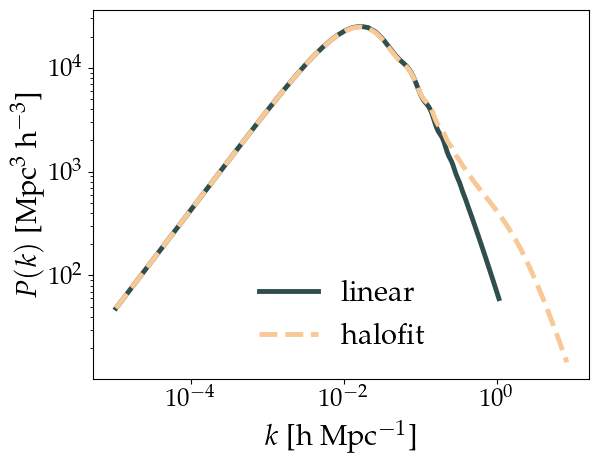

In [26]:
myfontsize=21
# compare the two spectra in a plot

plt.loglog(linear_pk['k'], linear_pk['Pk'], label='linear', color=my_color_darker, linewidth=3.5) 
plt.loglog(halofit_pk['k'], halofit_pk['Pk'], label='halofit', linestyle='--', color=my_color2, linewidth=3.5)
plt.xlabel('$k$ [h Mpc$^{-1}$]', fontsize=myfontsize)
plt.ylabel('$P(k)$ [Mpc$^3$ h$^{-3}$]', fontsize=myfontsize)
plt.legend(frameon=False, fontsize=myfontsize)
plt.savefig('plots/power_spectrum.pdf', bbox_inches='tight')
plt.show()